Shortest Job First Scheduling Algorithm (Non-Preemptive)

Shortest Job First (NON-PREEMPTIVE)

Process Order      Burst Time      Start Time      Completion Time
	4		3		0		3
	1		6		3		9
	3		7		9		16
	2		8		16		24
1. Process Order: P4,P1,P3,P2
2. Completion Order: 0,3,9,16,24
3. Start time: 0,3,9,16
4. Completion time: 3,9,16,24
5. Processes with completion time: ('P4', 3),('P1', 9),('P3', 16),('P2', 24)
6. Average Waiting  time: 7.0
7. Average turn around  time: 13.0


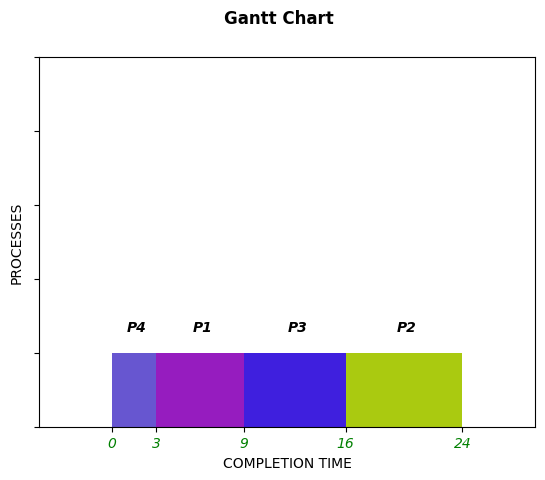

In [1]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import random

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
    
#shortest job first algorithm 
def SJF(bursttime, x):
    print(color.BOLD + color.UNDERLINE + "Shortest Job First (NON-PREEMPTIVE)\n"+ color.END)
    print(color.BOLD+"Process Order      Burst Time      Start Time      Completion Time"+color.END)
    i = 0
    starting_time = 0
    completion_time = 0
    yvalue = []
    startlst = []
    completionlst = []
    processlist = []
    totaltime = []
    while (i < len(bursttime)):
        completion_time += bursttime[i]
        print("\t"  + str(x.index(bursttime[i])+1)+ "\t\t" + str(bursttime[i]) + "\t\t" + str(starting_time) + "\t\t"
             + str(completion_time))
        
        processlist.append( "P"+str(x.index(bursttime[i])+1) )
        
        x[x.index(bursttime[i])] = -1
        startlst.append(starting_time)
        completionlst.append(completion_time)
        starting_time += bursttime[i]
        
        i += 1
    totaltime = startlst.copy()
    totaltime.append(completionlst[-1])
    
    avgwt = (sum(startlst)/ len(startlst))
    avgtat = (sum(completionlst)/ len(completionlst))
    
    return(startlst,completionlst,avgwt,avgtat,processlist,totaltime)

def drawGantt():
    # Declaring a figure "gnt", # Setting Y-axis limits, X-axis limits, # Setting labels for x-axis and y-axis
    fig, gnt = plt.subplots()
    ax = plt.gca()
    
    plt.ylabel("Processes")
    plt.xlabel("X Label")
    
    gnt.set_xlim(-5, sjf_lis[1][-1]+5)
    gnt.set_ylim(0, 5)
    
    gnt.set_xlabel('COMPLETION TIME')
    gnt.set_ylabel('PROCESSES')
    
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xticks(sjf_lis[5])
    ax.set_xticklabels(labels = sjf_lis[5], fontstyle='italic', color='green')

    # Setting graph attribute
    #gnt.grid(True)
    
    #plt.box(False)
    no_of_colors=np
    colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])for j in range(no_of_colors)]

    # Declaring a bar in schedule
    i = 0
    while i < len(sjf_lis[1]):
        ax.text((sjf_lis[0][i]+(sjf_lis[1][i]-sjf_lis[0][i])/2)-0.5, 1.3, sjf_lis[4][i], style='italic',weight='bold')
        gnt.broken_barh([(sjf_lis[0][i], sjf_lis[1][i]-sjf_lis[0][i])], (0, 1), facecolors =(colors[i]))
        i += 1
    merge = list(zip((sjf_lis[4]), (sjf_lis[1])))
    
    print("1. Process Order: "+ str(",".join(str(item) for item in sjf_lis[4])))
    print("2. Completion Order: "+ str(",".join(str(item) for item in sjf_lis[5])))
    print("3. Start time: "+ str(",".join(str(item) for item in sjf_lis[0])) )
    print("4. Completion time: "+ str(",".join(str(item) for item in sjf_lis[1])) )
    print ("5. Processes with completion time: " +  str(",".join(str(item) for item in merge)))
    print("6. Average Waiting  time: "+ str(sjf_lis[2]) )
    print("7. Average turn around  time: "+ str(sjf_lis[3]) )
    fig.suptitle('Gantt Chart\n', fontweight ="bold")

    return(plt.savefig("sjfgantt.png"))

#read file line by line to get input of algorithm
filedata = []
filepath = 'sjf.txt'
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        filedata_lines = line.strip().split(":")
        filedata.append(filedata_lines[1])
        line = fp.readline()
        cnt += 1
        
#number of processes        
np = len(filedata)

# Burst time of all processes
burst_times = ([int(x) for x in filedata])

#SJF
sjf_lis  = SJF(sorted(burst_times),burst_times)

#ganttchart
sjf_gantt  = drawGantt()